# TP 3 Regression linéaire
Dans ce TP, nous aimerions prédire l'admission d'un étudiant à une specialité donnée selon ses notes dans deux matières.

Pour ce faire, nous étudierons un ensemble de données avec l'admission  (y) et les notes des deux modules (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [3]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=int)
data.shape

(100, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente l'admission à la specialité (1 admis 0 non admis).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [4]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2]

In [5]:
print('X', X.shape ,' y ', y.shape)

X (100, 3)  y  (100,)


# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [6]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1/(1+np.exp(-z))

In [7]:
def model(X: np.ndarray, theta):
    return Sigmoid(X.dot(theta))

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [8]:
def computeCost(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    m=X.shape[0]
    return - (1/m) *(np.sum(y*np.log(model(X,theta))+(1-y)*np.log(1-model(X,theta))))

    # calculer le coût avec et sans vectorisation, 
def computeCostNonVect(X, y, theta):
    m=X.shape[0]
    cost=0
    for i in range(m):
        cost += y[i]*np.log(model(X[i],theta))+(1-y[i])*np.log(1-model(X[i],theta))
    return - (1/m) * cost

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [9]:
def computeGradient(X: np.ndarray, y: np.ndarray, theta: np.ndarray):
    # predicted values for each example
    h = model(X, theta)
    m = X.shape[0]
    # A, B two matrices, A * B is the sum of the dot product of rows of A and columns of B
    return np.dot(X.T,(h - y)) / m

In [10]:
def gradientDescent(X, y, theta, alpha, iterations, show_cost_each=100):
    # initialize some useful values
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 3))
    for i in range(iterations):
        # save the current theta
        theta_history[i] = theta
        # compute gradients
        gradients = computeGradient(X, y, theta)
        # update theta
        theta = theta - alpha * gradients
        
        # compute cost
        cost_history[i] = computeCost(X, y, theta)
        
        # print the cost every 100 iterations
        if i % show_cost_each == 0:
            print(f"Cost at iteration {i}: {cost_history[i]}")
    
    return theta, cost_history , theta_history

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [11]:
n=X.shape[1]
theta = np.zeros((3))
theta.shape

(3,)

Calculer le cout initial

In [12]:
import timeit


initialCost=computeCost(X, y, theta)
print('initial cost', initialCost)
#comparer le temps de calcul avec et sans vectorisation
print(f'le temps en micro second avec vectorisation est {timeit.timeit("computeCost(X, y, theta)", setup="from __main__ import computeCost, X, y, theta", number=1)}')
print(f'le temps en micro second sans vectorisation est {timeit.timeit("computeCostNonVect(X, y, theta)", setup="from __main__ import computeCostNonVect, X, y, theta", number=1)}')

initial cost 0.6931471805599453
le temps en micro second avec vectorisation est 5.470000905916095e-05
le temps en micro second sans vectorisation est 0.0012953999685123563


Appel des la fonction de calcul du gradient

In [13]:
# paramètres
iterations = 100000
alpha = 0.025
# Appel
theta, cost_history,theta_history = gradientDescent(X, y, theta, alpha, iterations)

Cost at iteration 0: 0.6826222443253682
Cost at iteration 100: 0.6159951944507137
Cost at iteration 200: 0.6040429090842776
Cost at iteration 300: 0.5926273739621728
Cost at iteration 400: 0.5817234289698202
Cost at iteration 500: 0.5713065209104906
Cost at iteration 600: 0.5613528009609068
Cost at iteration 700: 0.5518392016358017
Cost at iteration 800: 0.5427434948250759
Cost at iteration 900: 0.5340443327757769
Cost at iteration 1000: 0.5257212739972605
Cost at iteration 1100: 0.5177547960827031
Cost at iteration 1200: 0.510126297384265
Cost at iteration 1300: 0.5028180893718116
Cost at iteration 1400: 0.4958133813631618
Cost at iteration 1500: 0.4890962591515167
Cost at iteration 1600: 0.4826516588844712
Cost at iteration 1700: 0.47646533737748714
Cost at iteration 1800: 0.47052383987929347
Cost at iteration 1900: 0.46481446615166183
Cost at iteration 2000: 0.4593252355840254
Cost at iteration 2100: 0.4540448519358664
Cost at iteration 2200: 0.4489626681870602
Cost at iteration 230

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [14]:
def drawLine():
    # getting the x co-ordinates of the decision boundary
    plot_x = np.array([min(X[:,1]) - 2, max(X[:,2]) + 2])

    # getting corresponding y co-ordinates of the decision boundary
    plot_y = (-1/theta[2]) * (theta[1] * plot_x + theta[0])
    return plot_x, plot_y

# Affichage 
Graphe representant les acceptations selon les caracteristiques

Text(0, 0.5, 'Note module 2')

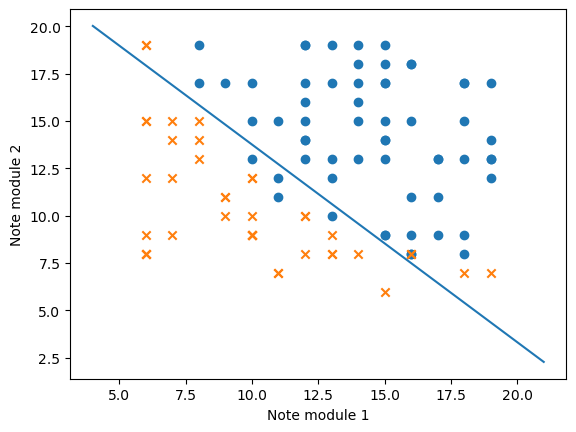

In [15]:
plot_x, plot_y = drawLine()

plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')
plt.plot(plot_x, plot_y, label = "Decision_Boundary")
plt.xlabel('Note module 1')
plt.ylabel('Note module 2')

Traçage du coût en fonction de nombre d'itteration

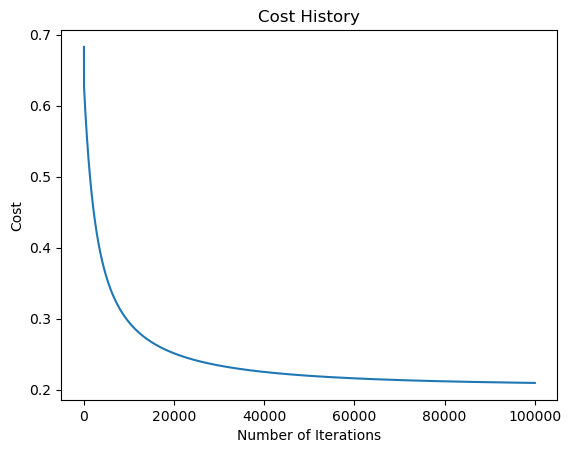

In [16]:
# plot cost history
plt.plot(range(iterations), cost_history)
plt.title('Cost History')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.show()

Traçage du coût en fonction de theta0 et theta1

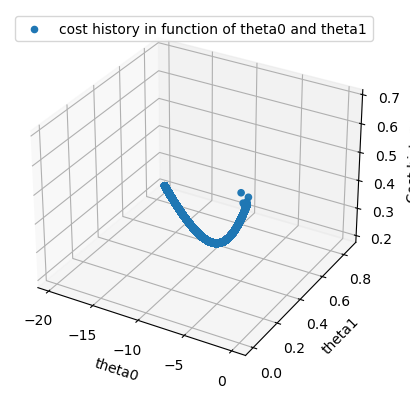

In [17]:
theta_history.shape
ax = plt.axes(projection='3d')
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('Cost history')

ax.scatter3D( theta_history[:,0],theta_history[:,1],cost_history)
ax.legend(["cost history in function of theta0 and theta1"]) 

Prédire des valeurs de y

In [18]:
# Predire pour des notes note1= 9 et note2=17
predict = np.array([1, 9, 17])
print('Prediction pour note1= 9 et note2=17', model(predict, theta))

Prediction pour note1= 9 et note2=17 0.8583886537125968


# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[:,1:], y, test_size=0.2, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Accuracy score de notre modele avec sklearn', accuracy_score(y_test, y_pred))

Accuracy score de notre modele avec sklearn 0.85


In [26]:
y_pred = model(X_test, theta)
print('Accuracy score de notre modele sans sklearn', accuracy_score(y_test, y_pred))

ValueError: shapes (20,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 18 Avril 2023


In [21]:
# bonne chance